In [26]:
import numpy as np

In [45]:
def ndcg(labels: list[int]):
    """Compute the Normalized Discounted Cumulative Gain (NDCG) https://doi.org/10.48550/arXiv.1304.6480 for binary labels.

    Arguments
    ---------
    labels: list
        List of binary labels (0 or 1).

    Returns
    -------
    float:
        The NDCG score.
    """
    labels = np.asarray(labels)

    def dcg_binary(binary_labels):
        gains = binary_labels  # Gains are the binary labels
        discounts = 1.0 / np.log2(np.arange(2, len(binary_labels) + 2))
        print(discounts)
        return np.sum(gains * discounts)

    ideal_labels = np.sort(labels)[::-1]  # Ideal ranking (sorted labels)
    actual_dcg = dcg_binary(labels)  # Use binary DCG
    ideal_dcg = dcg_binary(ideal_labels)  # Use binary DCG for ideal
    print(actual_dcg, ideal_dcg)

    return actual_dcg / ideal_dcg if ideal_dcg > 0 else 0.0

In [46]:

print(ndcg([0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1]))

[1.         0.63092975 0.5        0.43067656 0.38685281 0.35620719
 0.33333333 0.31546488 0.30103    0.28906483 0.27894295 0.27023815
 0.26264954 0.25595802 0.25       0.24465054 0.23981247 0.23540891
 0.23137821 0.22767025 0.22424382 0.22106473 0.21810429 0.21533828
 0.21274605 0.21030992 0.2080146  0.20584683 0.20379505 0.20184909
 0.2        0.19823986]
[1.         0.63092975 0.5        0.43067656 0.38685281 0.35620719
 0.33333333 0.31546488 0.30103    0.28906483 0.27894295 0.27023815
 0.26264954 0.25595802 0.25       0.24465054 0.23981247 0.23540891
 0.23137821 0.22767025 0.22424382 0.22106473 0.21810429 0.21533828
 0.21274605 0.21030992 0.2080146  0.20584683 0.20379505 0.20184909
 0.2        0.19823986]
3.3754180095215878 5.092740438166795
0.6627901128094048


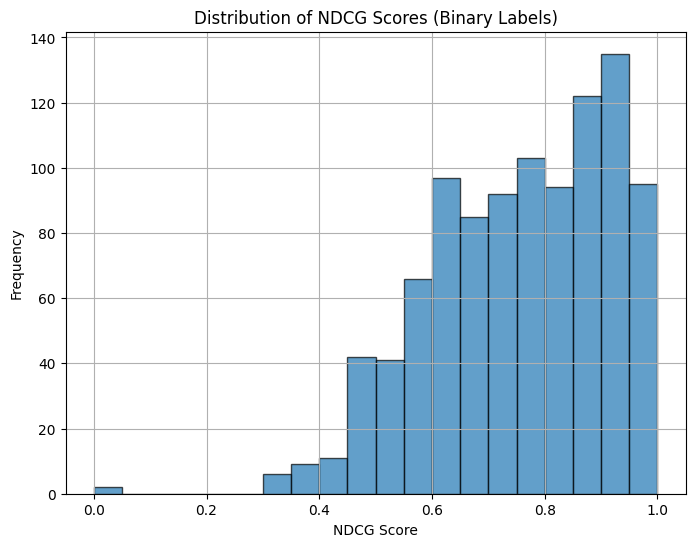

In [35]:
import matplotlib.pyplot as plt
# Example usage and distribution visualization:

num_samples = 1000  # Number of random label sets to generate
ndcg_values = []

for _ in range(num_samples):
    true_labels_binary = np.random.randint(0, 2, size=10)  # 10 random binary labels
    ndcg_values.append(ndcg(true_labels_binary))

# Plotting the distribution
plt.figure(figsize=(8, 6))
plt.hist(ndcg_values, bins=20, edgecolor='black', alpha=0.7)  # Adjust bins as needed
plt.title('Distribution of NDCG Scores (Binary Labels)')
plt.xlabel('NDCG Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [37]:
true_labels_binary

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 0])